<div class="head0">
    <div class="head0__name">
        Examples for mtr.difscheb module
    </div>
    <div class="head0__note">
        Construction of the Chebyshev differential matrices.
    </div>
</div>

In [1]:
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from fpcross import ij, Grid, difscheb, dif1cheb, dif2cheb

ij()

Start |  2:28PM MSK on Oct 10, 2019 | python 3.7.1    |
-------------------------------------------------------


<div class="head1">
    <div class="head1__name">
        Check for the matrix items
    </div>
</div>

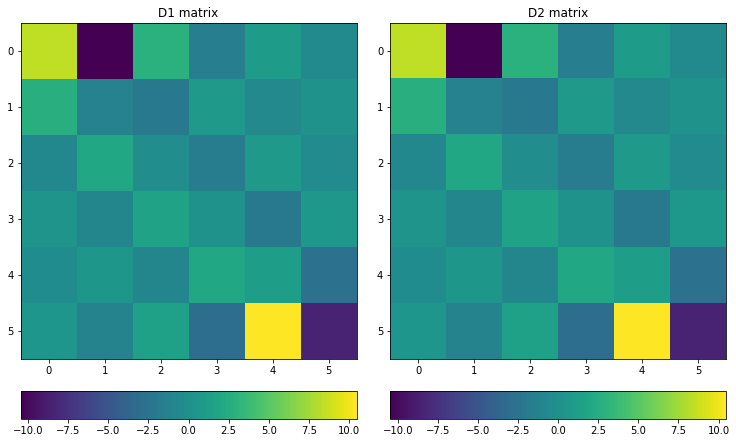

Error for D1 D1 = D2                       : 1.42e-14
Error for D1[0, 0] = (2N^2+1)/6            : 1.78e-15
Error for D1[0, 2] = + 2 / (1-x2)          : 0.00e+00
Error for D1[0, 3] = - 2 / (1-x3)          : 2.22e-16
Error for D1[4, 4] = - x[4] / 2 / (1-x4^2) : 6.66e-16


In [2]:
N = 5

SG = Grid(d=1, n=N+1, l=[-1., 1.])
D1 = dif1cheb(SG)
D2 = dif2cheb(SG)

fig = plt.figure(figsize=(10, 6))
gs = mpl.gridspec.GridSpec(
    ncols=2, nrows=2, left=0.01, right=0.99, top=0.99, bottom=0.01,
    wspace=0.1, hspace=0.02, width_ratios=[1, 1], height_ratios=[14, 1]
)

ax = fig.add_subplot(gs[0, 0])
ax.set_title('D1 matrix')
im = ax.imshow(D1)
ax = fig.add_subplot(gs[1, 0])
cb = plt.colorbar(im, cax=ax, orientation='horizontal')

ax = fig.add_subplot(gs[0, 1])
ax.set_title('D2 matrix')
im = ax.imshow(D1)
ax = fig.add_subplot(gs[1, 1])
cb = plt.colorbar(im, cax=ax, orientation='horizontal')

plt.show()

X = SG.comp()[0, :]

e = np.max(np.abs(D1@D1 - D2))
print('Error for D1 D1 = D2                       : %-8.2e'%np.max(np.abs(e)))

e = D1[0, 0] - (2.*N**2+1.) / 6.
print('Error for D1[0, 0] = (2N^2+1)/6            : %-8.2e'%np.max(np.abs(e)))

e = D1[0, 2] - 2. / (1. - X[2])
print('Error for D1[0, 2] = + 2 / (1-x2)          : %-8.2e'%np.max(np.abs(e)))

e = D1[0, 3] + 2. / (1. - X[3])
print('Error for D1[0, 3] = - 2 / (1-x3)          : %-8.2e'%np.max(np.abs(e)))

e = D1[4, 4] + X[4] / (1. - X[4]**2) / 2.
print('Error for D1[4, 4] = - x[4] / 2 / (1-x4^2) : %-8.2e'%np.max(np.abs(e)))

<div class="head0">
    <div class="head0__name">
        DRAFT below
    </div>
</div>

<div class="head1">
    <div class="head1__name">
        1D PDE solution by Chebyshev differentiation matrix
    </div>
</div>

Consider a model PDE

$$
\Delta u(x) = f(x),
\quad
x \in [0, 4],
\quad
u(0) = 0,
\quad
u(4) = 0,
\quad
f(x) = -\pi^2 \sin{(\pi x)},
$$
with known exact solution
$$
u(x) = \sin{(\pi x)}.
$$

We can solve it on the Chebyshev grid using 2th order Chebyshev differentiation matrix from the system
$$
D u = f,
$$
excluding boundary points.

<div class="head2">
    <div class="head2__name">
        Direct solution
    </div>
</div>

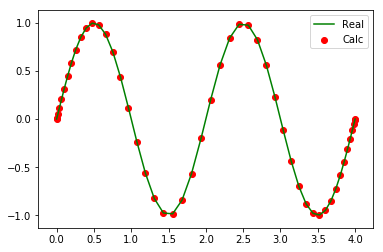

Number of spatial points :       50
Error                    : 9.16e-15    


In [14]:
def func_u(x):
    return np.sin(np.pi*x)

def func_f(x):
    return -1. * np.pi * np.pi * np.sin(np.pi*x)

IT = Intertrain(n=[50], l=[[0., 4.]])

X = IT.grid()
I = np.eye(IT.n[0])
J = np.eye(IT.n[0]); J[0, 0] = 0.; J[-1, -1] = 0.
D = J @ IT.dif2() + I - J
f = J @ (func_f(X).reshape(-1, 1))

u_calc = np.linalg.solve(D, f).reshape(-1)
u_real = func_u(X).reshape(-1)
e = np.linalg.norm(u_real-u_calc) / np.linalg.norm(u_real)
x = X.reshape(-1)

plt.plot(x, u_real, c='g', label='Real')
plt.scatter(x, u_calc, c='r', label='Calc')
plt.legend(loc='best')
plt.show()

print('Number of spatial points : %8d'%IT.n[0])
print('Error                    : %-12.2e'%e)

<div class="head2">
    <div class="head2__name">
        Time and convergence rates
    </div>
</div>

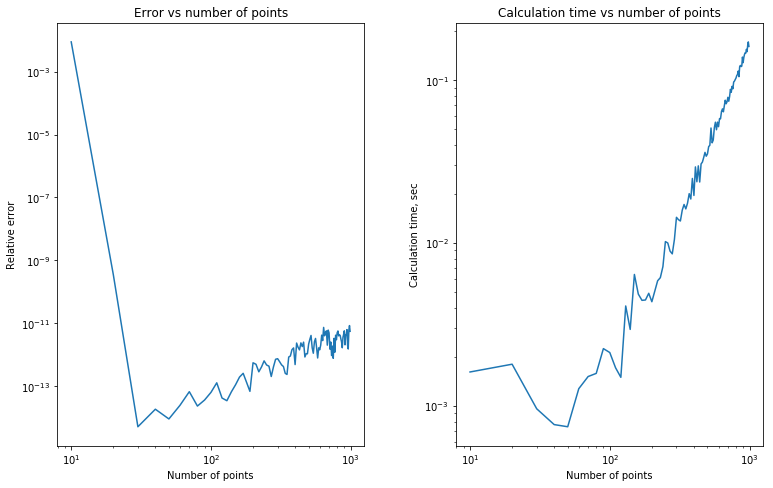

In [15]:
N = np.arange(10, 1000, 10)
T = []
E = []

for n in N:
    t = time.time()
    
    IT = Intertrain(n=[n], l=[[0., 4.]])

    X = IT.grid()
    I = np.eye(IT.n[0])
    J = np.eye(IT.n[0]); J[0, 0] = 0.; J[-1, -1] = 0.
    D = J @ IT.dif2() + I - J
    f = J @ (func_f(X).reshape(-1, 1))

    u_calc = np.linalg.solve(D, f).reshape(-1)
    u_real = func_u(X).reshape(-1)
    e = np.linalg.norm(u_real-u_calc) / np.linalg.norm(u_real)

    E.append(e) 
    T.append(time.time() - t)
    

fig = plt.figure(figsize=(10, 6))
gs = mpl.gridspec.GridSpec(ncols=2, nrows=1, left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.3)

ax = fig.add_subplot(gs[0, 0])
ax.plot(N, E)
ax.set_title('Error vs number of points')
ax.set_xlabel('Number of points')
ax.set_ylabel('Relative error')
ax.semilogx()
ax.semilogy()

ax = fig.add_subplot(gs[0, 1])
ax.plot(N, T)
ax.set_title('Calculation time vs number of points')
ax.set_xlabel('Number of points')
ax.set_ylabel('Calculation time, sec')
ax.semilogx()
ax.semilogy()

plt.show()

<div class="head1">
    <div class="head1__name">
        1D time dependent PDE solution by Chebyshev differentiation matrix
    </div>
</div>

Let consider a model PDE

$$
\frac{\partial \, u}{\partial \, t} = \Delta u(x)
\quad
x \in [-2, 1],
\quad
u(-2) = 0,
\quad
u(1) = 0,
\quad
u(x, 0) = \sin{(\pi x)},
$$
with known exact solution
$$
u(x, t) = \sin{(\pi x)} e^{-\pi^2t}.
$$

We can solve it for the time $t$ using uniform time grid with step $h$ and iterations
$$
u_{k+1}(x) = e^{h \cdot D_2} u_{k}(x),
\quad
k = 0, 1, \ldots, \frac{t}{h} - 1.
$$
where $u_{0}(x)$ is known initial condition.

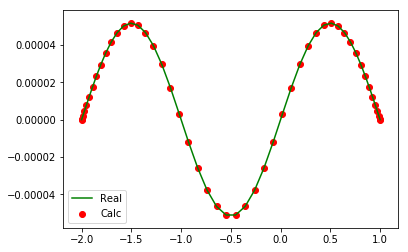

Number of time points    :    10000
Number of spatial points :       50
Error                    : 8.94e-10    


In [16]:
# Equation parameters

def func_u(x, t):
    return np.sin(np.pi*x) * np.exp(-1. * np.pi**2 * t)

def func_u0(x):
    return func_u(x, 0)

# Time grid

t_min = 0.
t_max = 1.
t_poi = 10000

m = t_poi
h = (t_max - t_min) / (t_poi - 1)

T = np.linspace(t_min, t_max, t_poi)

# Spatial grid and Cheb. dif. matrix

n = 50

IT = Intertrain(n=[n], l=[[-2., 1.]])
X = IT.grid()
D = IT.dif2()

# Solution

J = np.eye(n); J[0, 0] = 0.; J[-1, -1] = 0.

Z = expm(h * J @ D)

u = func_u0(X).reshape(-1)
for t in T[:-1]:
    u = Z@u

# Check result
    
t = t_max
x = X.reshape(-1)
v = func_u(X, t).reshape(-1)
e = np.linalg.norm(v - u) / np.linalg.norm(v)

# Output result

plt.plot(x, v, c='g', label='Real')
plt.scatter(x, u, c='r', label='Calc')
plt.legend(loc='best')
plt.show()


print('Number of time points    : %8d'%t_poi)
print('Number of spatial points : %8d'%IT.n[0])
print('Error                    : %-12.2e'%e)

<div class="head2">
    <div class="head2__name">
        Time and convergence rates vs number of spatial points
    </div>
</div>

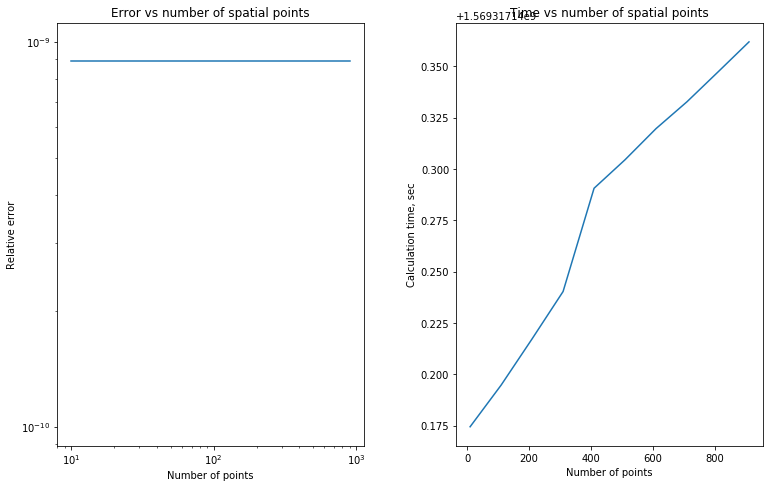

In [17]:
m = 10000
N = np.arange(10, 1000, 100)
Ts = []
Es = []

for n in N:
    t = time.time()

    t_min = 0.
    t_max = 1.
    t_poi = m

    h = (t_max - t_min) / (t_poi - 1)

    T = np.linspace(t_min, t_max, t_poi)

    n = 50

    IT = Intertrain(n=[n], l=[[-2., 1.]])
    X = IT.grid()
    D = IT.dif2()

    J = np.eye(n); J[0, 0] = 0.; J[-1, -1] = 0.

    Z = expm(h * J @ D)

    u = func_u0(X).reshape(-1)
    for t in T[:-1]:
        u = Z@u

    t = t_max
    x = X.reshape(-1)
    v = func_u(X, t).reshape(-1)
    e = np.linalg.norm(v - u) / np.linalg.norm(v)

    Es.append(e)
    Ts.append(time.time() - t)
    
fig = plt.figure(figsize=(10, 6))
gs = mpl.gridspec.GridSpec(ncols=2, nrows=1, left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.3)

ax = fig.add_subplot(gs[0, 0])
ax.plot(N, Es)
ax.set_title('Error vs number of spatial points')
ax.set_xlabel('Number of points')
ax.set_ylabel('Relative error')
ax.semilogx()
ax.semilogy()

ax = fig.add_subplot(gs[0, 1])
ax.plot(N, Ts)
ax.set_title('Time vs number of spatial points')
ax.set_xlabel('Number of points')
ax.set_ylabel('Calculation time, sec')
#ax.semilogx()
#ax.semilogy()

plt.show()

<div class="head2">
    <div class="head2__name">
        Time and convergence rates vs number of time points
    </div>
</div>

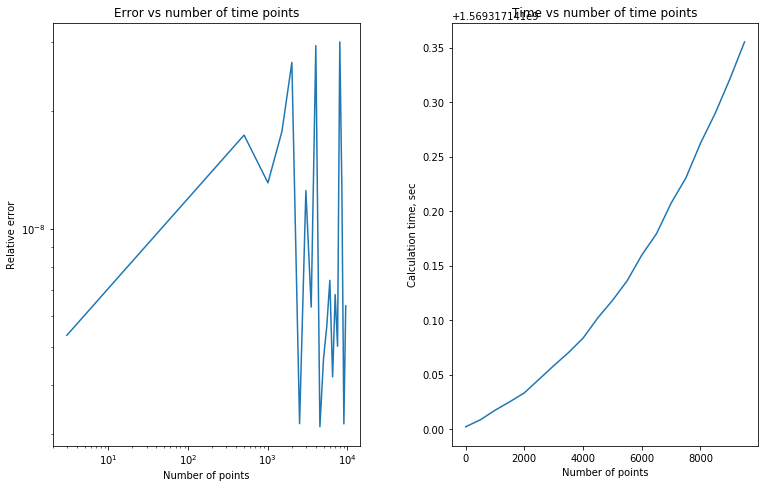

In [18]:
n = 100
M = np.arange(3, 10000, 500)
Ts = []
Es = []

for m in M:
    t = time.time()

    t_min = 0.
    t_max = 1.
    t_poi = m

    h = (t_max - t_min) / (t_poi - 1)

    T = np.linspace(t_min, t_max, t_poi)

    IT = Intertrain(n=[n], l=[[-1., 1.]])
    X = IT.grid()
    D = IT.dif2()

    J = np.eye(n); J[0, 0] = 0.; J[-1, -1] = 0.

    Z = expm(h * J @ D)

    u = func_u0(X).reshape(-1)
    for t in T[:-1]:
        u = Z@u

    t = t_max
    x = X.reshape(-1)
    v = func_u(X, t).reshape(-1)
    e = np.linalg.norm(v - u) / np.linalg.norm(v)

    Es.append(e)
    Ts.append(time.time() - t)

    
fig = plt.figure(figsize=(10, 6))
gs = mpl.gridspec.GridSpec(ncols=2, nrows=1, left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.3)

ax = fig.add_subplot(gs[0, 0])
ax.plot(M, Es)
ax.set_title('Error vs number of time points')
ax.set_xlabel('Number of points')
ax.set_ylabel('Relative error')
ax.semilogx()
ax.semilogy()

ax = fig.add_subplot(gs[0, 1])
ax.plot(M, Ts)
ax.set_title('Time vs number of time points')
ax.set_xlabel('Number of points')
ax.set_ylabel('Calculation time, sec')
#ax.semilogx()
#ax.semilogy()

plt.show()

<div class="end"></div>